# Calculate Linear Regression Using Scipy and Machine Learning
### Author: Cera Drake
##### [Project Repo](https://github.com/ceradrake/datafun-07-ml-predictive)

### Part 1: Linear Regression

##### Section 1: Load

In [82]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]

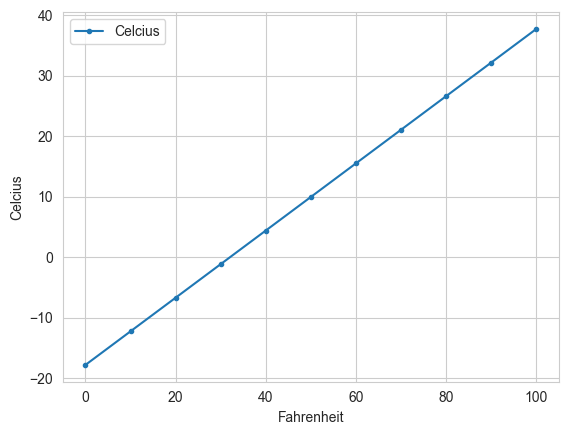

In [83]:
import pandas as pd
temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celcius'])
axes = temps_df.plot(x='Fahrenheit', y='Celcius', style='.-')
y_label = axes.set_ylabel('Celcius')

In [84]:
nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

##### Section 2 - View
###### Load the head and the tail of the file

In [85]:
nyc.head(), nyc.tail()

(     Date  Value  Anomaly
 0  189501   34.2     -3.2
 1  189601   34.7     -2.7
 2  189701   35.5     -1.9
 3  189801   39.6      2.2
 4  189901   36.4     -1.0,
        Date  Value  Anomaly
 119  201401   35.5     -1.9
 120  201501   36.1     -1.3
 121  201601   40.8      3.4
 122  201701   42.8      5.4
 123  201801   38.7      1.3)

##### Section 3 - Clean

In [86]:
nyc.columns = ['Date', 'Temperature', 'Anomaly']
nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [87]:
nyc.Date.dtype

dtype('int64')

In [88]:
nyc.Date = nyc.Date.floordiv(100)
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Section 4 - Describe

In [89]:
nyc.Temperature.describe()

count    124.000000
mean      37.595161
std        4.539848
min       26.100000
25%       34.575000
50%       37.600000
75%       40.600000
max       47.600000
Name: Temperature, dtype: float64

##### Section 5  - Calculate the best fit line 

In [90]:
from scipy import stats
linear_regression = stats.linregress(x=nyc.Date, y=nyc.Temperature)

In [91]:
linear_regression.slope

0.014771361132966163

In [92]:
linear_regression.intercept

8.694993233674289

##### Section 6 - Predict the temp in 2026

In [93]:
linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

##### Section 7 - Plot

(10.0, 70.0)

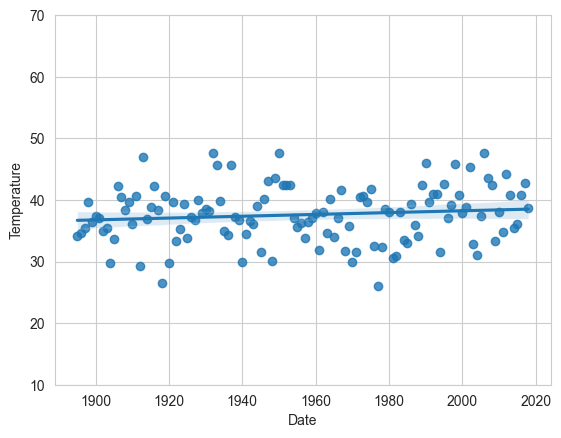

In [94]:
import seaborn as sns
sns.set_style('whitegrid')
axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)
axes.set_ylim(10, 70)

### Part 2 - Machine Learning

##### Load the average high temps (imported above for the previous example)

##### Load a few examples

In [95]:
nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


##### Split the data for training and testing

In [96]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

##### Confirm a 75%-25% train-test  split

In [97]:
X_train.shape , X_test.shape

((93, 1), (31, 1))

##### Run a linear regression

In [98]:
from sklearn.linear_model import LinearRegression
linear_regression = LinearRegression()
linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

##### Find the slope and intercept

In [99]:
linear_regression.coef_ , linear_regression.intercept_

(array([0.01939167]), -0.30779820252656975)

##### Test the model

In [100]:
predicted = linear_regression.predict(X_test)
expected = y_test
for p, e in zip(predicted[::5], expected [::5]): print(f'predicted: {p:.2f}, expected {e:.2f}')

predicted: 37.86, expected 31.70
predicted: 38.69, expected 34.80
predicted: 37.00, expected 39.40
predicted: 37.25, expected 45.70
predicted: 38.05, expected 32.30
predicted: 37.64, expected 33.80
predicted: 36.94, expected 39.70


##### Estimate a past temperature and predict a future temperature

In [101]:
predict = (lambda x: linear_regression.coef_ * x + linear_regression.intercept_)
predict(2019) , predict(1890)

(array([38.84399018]), array([36.34246432]))

##### Create a scatter plot

c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

(10.0, 70.0)

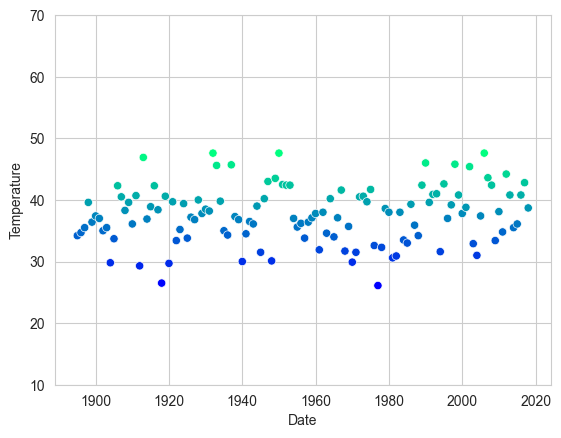

In [102]:
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)

###### Display the regression line

c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\cerad\OneDrive\Desktop\Data Analytics Fundamentals 44608-80.81\datafun-07-ml-predictive\.venv\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector)

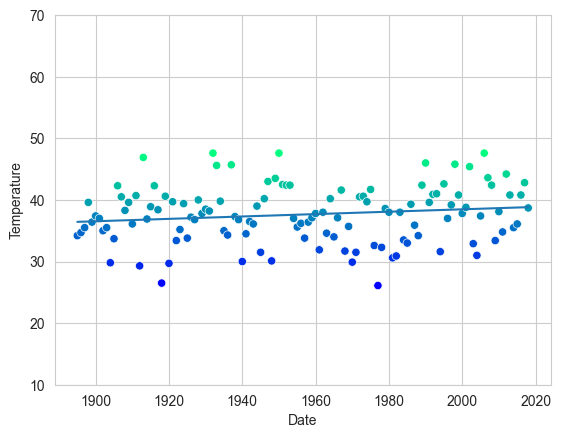

In [109]:
import numpy as np
import matplotlib.pyplot as plt
axes = sns.scatterplot(data=nyc, x='Date', y='Temperature', hue='Temperature', palette='winter', legend=False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)

### Comparing the 2 methods - 
### It seems like machine learning can handle large data sets better than scipy can. I think machine learning could also be a little bit easier because you don't have to define some of the functions. Scipy is probably quicker if you don't have a ton of data, and you can customize it easier. 